# ***Medical Insurance Cost Prediction***

**Import the libraries**


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Data Collection & Analysis**

In [24]:
# Loading the data from csv file to a DataFrame
insurance_dataset = pd.read_csv(r'C:\Users\huyma\OneDrive\Desktop\insurance.csv')

In [26]:
# First 5 rows of the DataFrame
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
# Number of rows and columns insurance
insurance_dataset.shape

(1338, 7)

In [36]:
# Some information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorial Features
- Sex
- Smoker
- Region
- .....

In [39]:
# Checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Data Analysis**

In [64]:
# Statistical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

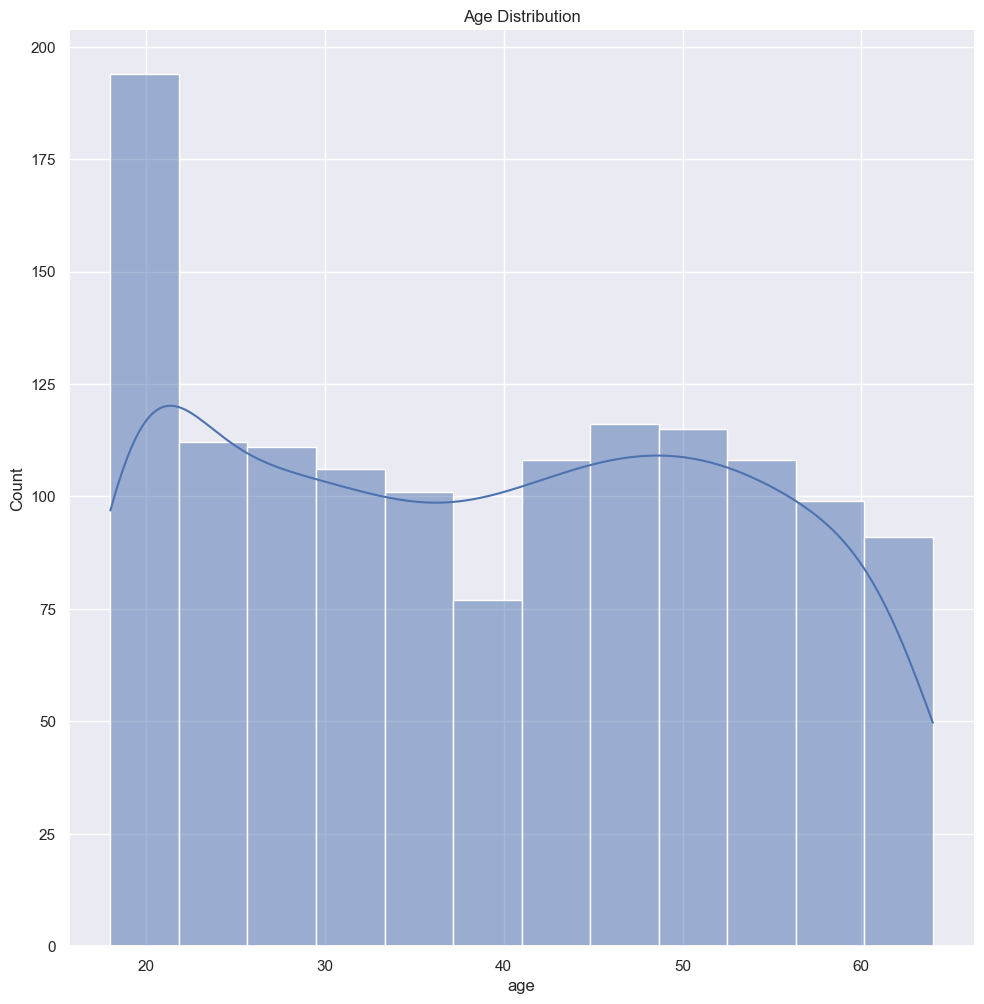

In [72]:
# Distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'], kde=True, height=10, aspect=1)
plt.title('Age Distribution')
plt.show()

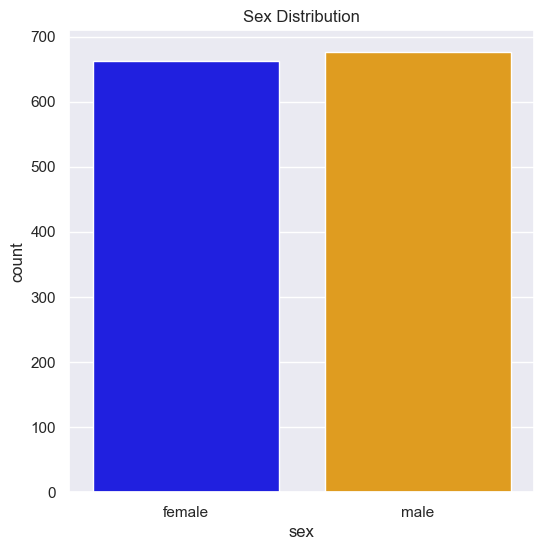

In [70]:
# Gender column
plt.figure(figsize=(6, 6))
sns.countplot(x = 'sex', data = insurance_dataset, hue = 'sex', palette = ['blue', 'orange'])
plt.title('Sex Distribution')
plt.show()


In [74]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

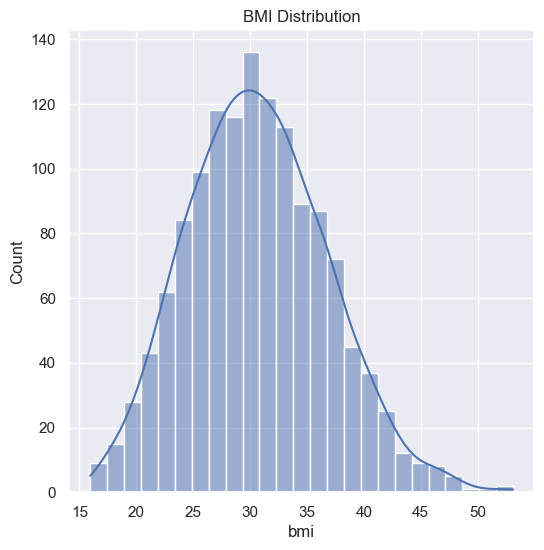

In [101]:
# bmi distribution
plt.figure(figsize=(6, 6))
sns.histplot(insurance_dataset['bmi'], kde = True)
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

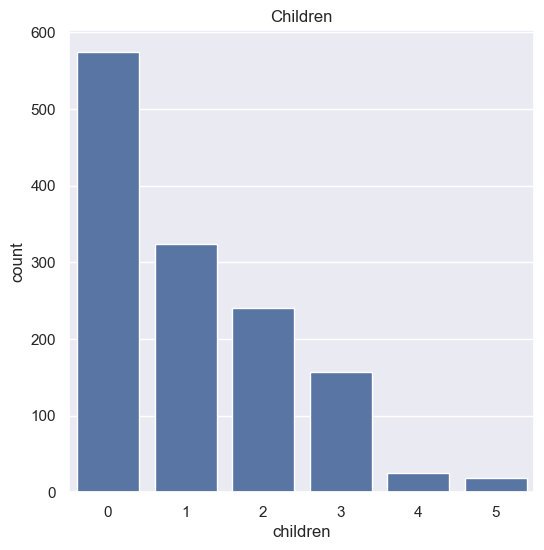

In [81]:
# children column
plt.figure(figsize = (6, 6))
sns.countplot(x = 'children', data = insurance_dataset)
plt.title('Children')
plt.show()

In [83]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

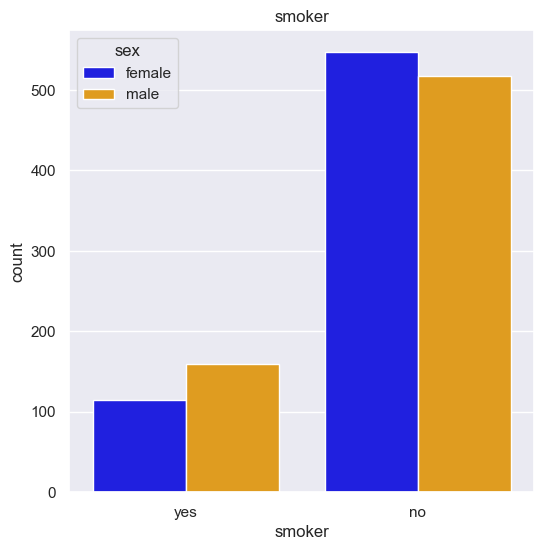

In [91]:
# smoker column
plt.figure(figsize = (6, 6))
sns.countplot(x = 'smoker', data = insurance_dataset, 
              hue = 'sex', palette = ['blue', 'orange'])
plt.title('smoker')
plt.show()

In [93]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

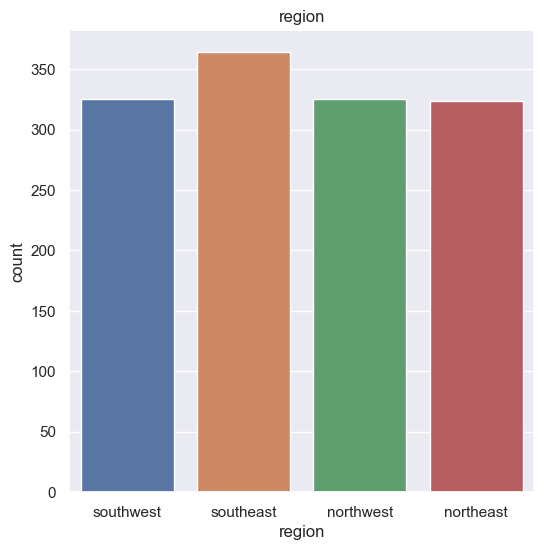

In [95]:
# region column
plt.figure(figsize = (6, 6))
sns.countplot(x = 'region', data = insurance_dataset, hue = 'region')
plt.title('region')
plt.show()

In [97]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

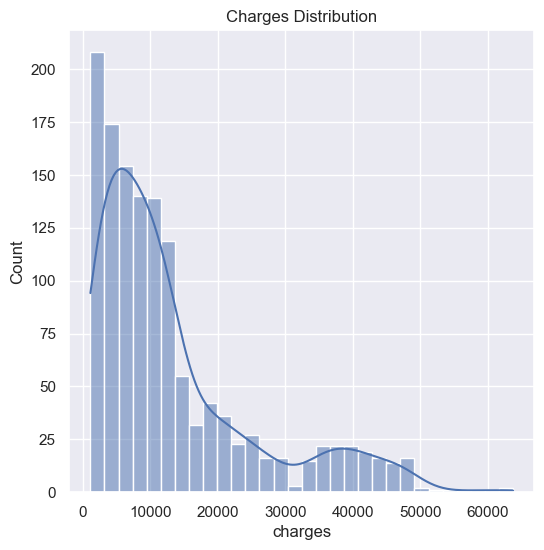

In [105]:
# distribution of charges value
plt.figure(figsize = (6, 6))
sns.histplot(insurance_dataset['charges'], kde = True)
plt.title('Charges Distribution')
plt.show()

**Data Pre-Processing**

Encoding the categorical features

In [116]:
# encoding sex column
insurance_dataset.replace({'sex': {'male': 0, 'female': 1}}, 
                          inplace = True)

# encoding 'smoker' column
insurance_dataset.replace({'smoker': {'yes': 0, 'no': 1}}, 
                          inplace = True)

# encoding 'region' column
insurance_dataset.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, 
                          inplace = True)

Splitting the Features and Target

In [119]:
X = insurance_dataset.drop(columns = 'charges', axis = 1)
Y = insurance_dataset['charges']

In [121]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [123]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training data & Testing Data

In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size = 0.2, 
                                                    random_state = 2)

print(X.shape, X_train.shape, X_test.shape)

**Model Training**

Linear Regression

In [138]:
# Loading the Linear Regression model
regressor = LinearRegression()

In [140]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model evaluation

In [145]:
# Prediction on training data
training_data_prediction = regressor.predict(X_train)

In [151]:
# R-squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R-squared vale: ', r2_train)

R-squared vale:  0.751505643411174


In [153]:
# Prediction on test data
test_data_prediction = regressor.predict(X_test)

In [155]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R-squared vale: ', r2_test)

R-squared vale:  0.7447273869684077


**Building a Predictive System**

In [164]:
def predict_insurance_cost(input_data):
    # Convert the input_data to a numpy array
    input_data_as_numpy_array = np.asarray(input_data)
    
    # Reshape the array to match the expected input for the model
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    
    # Make the prediction
    prediction = regressor.predict(input_data_reshaped)
    
    # Return the prediction (insurance cost)
    return round(prediction[0], 2)

In [168]:
# Example input
input_data = (31, 1, 25.74, 0, 1, 0)
insurance_cost = predict_insurance_cost(input_data)
print('The insurance cost is USD', insurance_cost)

The insurance cost is USD 3760.08


C:\Users\huyma\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**More visualisations**

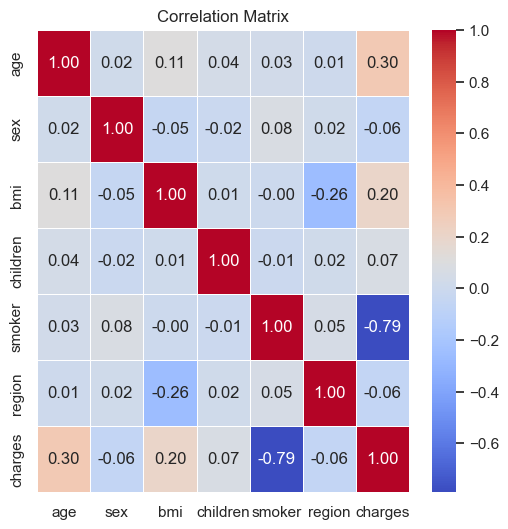

In [170]:
# Plot the heatmap
corr_matrix = insurance_dataset.corr()
plt.figure(figsize = (6, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', 
            fmt = '.2f', linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show()

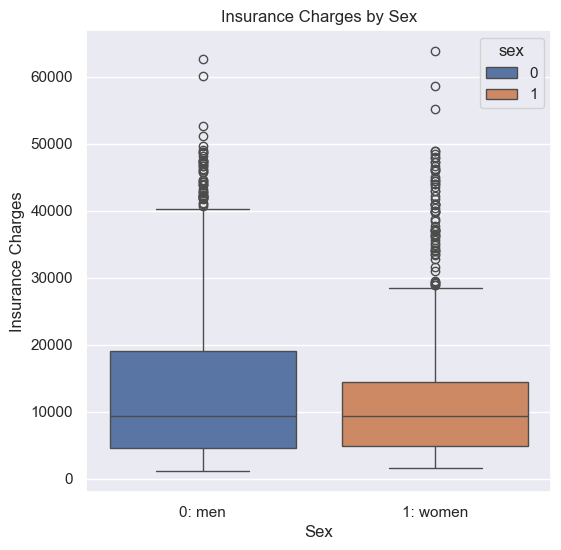

In [196]:
# Boxplot of charges by sex with custom colors for men and women
plt.figure(figsize = (6, 6))
sns.boxplot(x = 'sex', y = 'charges', data = insurance_dataset, hue = 'sex')
plt.xticks(ticks = [0, 1], labels = ['0: men', '1: women'])
plt.title('Insurance Charges by Sex')
plt.xlabel('Sex')
plt.ylabel('Insurance Charges')
plt.show()

In [200]:
# Group by 'sex' and calculate the average insurance charges for each group
average_charges_by_sex = insurance_dataset.groupby('sex')['charges'].mean()
average_charges_by_sex.index = average_charges_by_sex.index.map({0: 'men', 1: 'women'})
print(average_charges_by_sex)

sex
men      13956.751178
women    12569.578844
Name: charges, dtype: float64


**The End**